In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [43]:
with open("v24_s512_CCTHot.json", "r") as v24:
    v2411_s512_CCTHot=json.load(v24)
# with open("v2300_s512_WATT3.json", "r") as v23:
#     v2300_s512_WATT3=json.load(v23)

In [13]:
G=nx.DiGraph()

In [ ]:
G.add_node("0000_bidssrc")
parent=["0000_bidssrc"]
c = 0
while len(parent)!=0:
    c += 1
    if c == 4: break
    leaf=parent[0]
    print(leaf)
    for node in v2411[:]:
        if leaf in node["imports"]:
            node_name=node["name"]
            parent.append(node_name)
            G.add_node(node_name)
            G.add_edge(leaf,node_name)
    _=parent.pop(0)   

0000_bidssrc
0116_bids_info
0117_anat_ref_dimensions


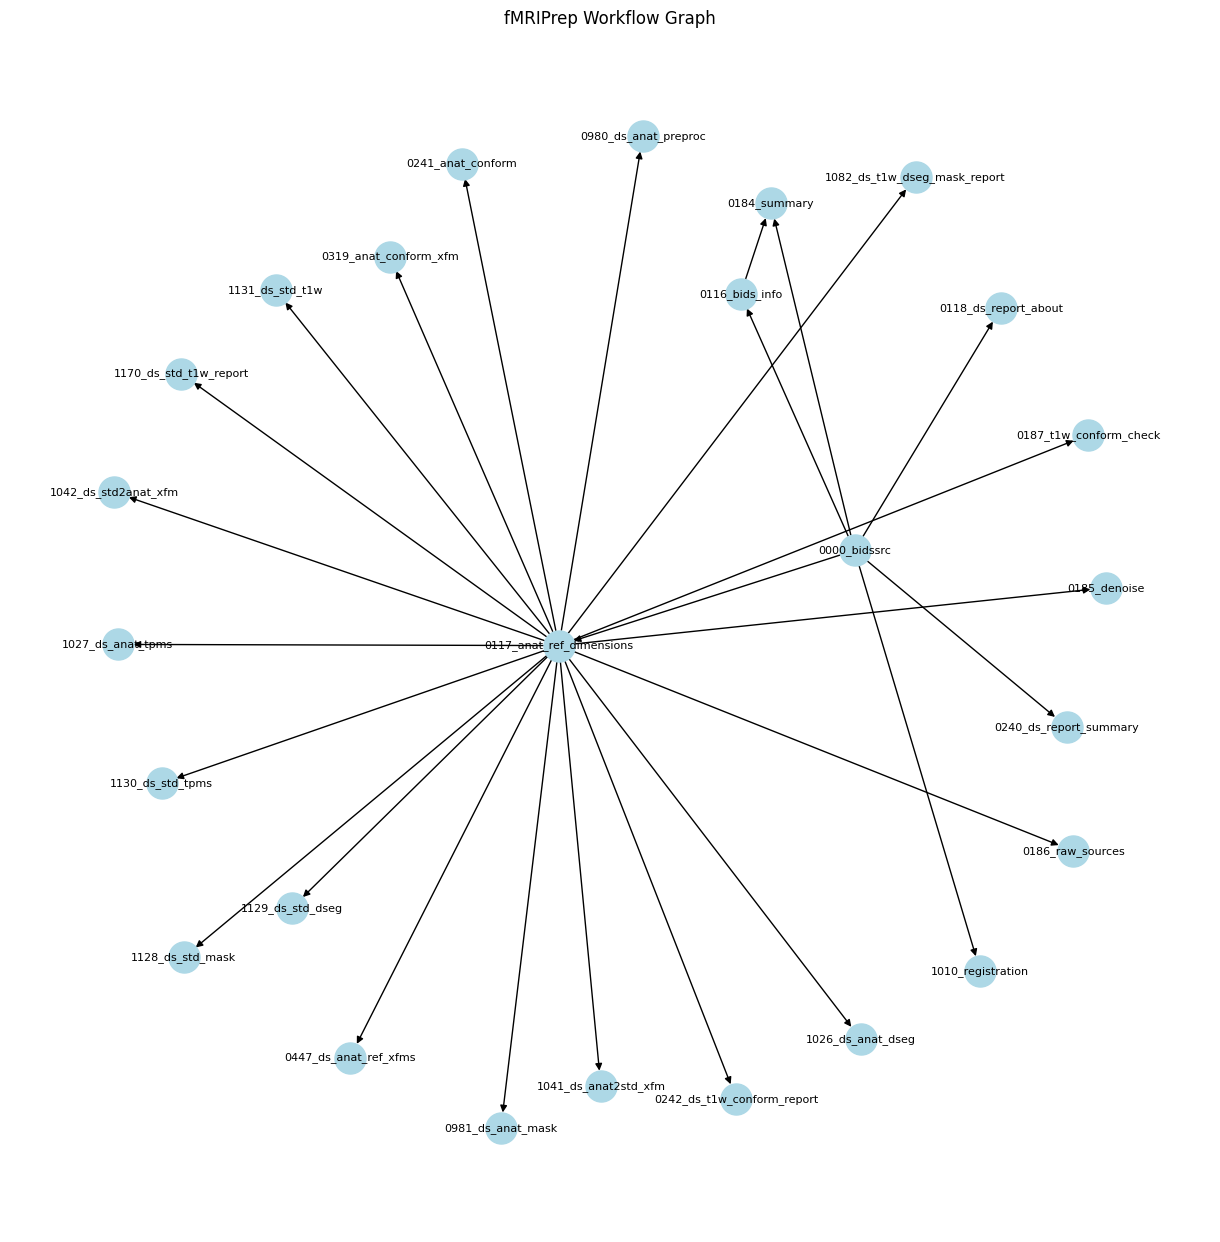

In [17]:
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
plt.title("fMRIPrep Workflow Graph")
plt.show()

In [44]:
from nipype import Node, Workflow
from nipype.interfaces.utility import IdentityInterface

dummy_interface = IdentityInterface(fields=["1"])
wf = Workflow(name="start")
all_nodes={}

# G.add_node("0000_bidssrc")
leaf_name="148_clipper_post"
parent=[leaf_name]
leaf_node=Node(dummy_interface,name=leaf_name)
all_nodes[leaf_name]=leaf_node

c = 0
while len(parent)!=0:
    if c!= 0:
        leaf_name=parent[0]
        if leaf_name not in all_nodes.keys():
            leaf_node=Node(dummy_interface,name=leaf_name)
            all_nodes[leaf_name]=leaf_node
        else:
            leaf_node=all_nodes[leaf_name]
        
    for node in v2411_s512_CCTHot[:]:

        if leaf_name==node["name"]:
            if len(node["imports"])>0:
                for node_name in node["imports"]:
                    parent.append(node_name)
                    if node_name not in all_nodes.keys():
                        parent_node=Node(dummy_interface,name=node_name)
                        all_nodes[node_name]=parent_node
                        wf.connect(parent_node,node_name,leaf_node,leaf_name+f'{c}')
                    else:
                        parent_node=all_nodes[node_name]
                        wf.connect(parent_node,node_name,leaf_node,leaf_name+f'{c}')
                    c += 1

    print(parent)
    _=parent.pop(0)  
    


['148_clipper_post', '143_n4']
['143_n4', '136_clipper_pre']
['136_clipper_pre', '133_average']
['133_average', '130_merge']
['130_merge', '126_resample']
['126_resample', '078_rotime', '072_n4_correct', '087_fmap_select', '122_ds_xform']
['078_rotime', '072_n4_correct', '087_fmap_select', '122_ds_xform', '072_n4_correct']
['072_n4_correct', '087_fmap_select', '122_ds_xform', '072_n4_correct', '067_fix_header', '038_fmapref_buffer']
['087_fmap_select', '122_ds_xform', '072_n4_correct', '067_fix_header', '038_fmapref_buffer', '069_out_merge_fmap_ref', '080_out_merge_fmap_coeff', '074_out_merge_fmap_mask', '014_out_merge_method', '013_out_merge_fmap_id']
['122_ds_xform', '072_n4_correct', '067_fix_header', '038_fmapref_buffer', '069_out_merge_fmap_ref', '080_out_merge_fmap_coeff', '074_out_merge_fmap_mask', '014_out_merge_method', '013_out_merge_fmap_id', '010_sources', '116_itk_mat2txt']
['072_n4_correct', '067_fix_header', '038_fmapref_buffer', '069_out_merge_fmap_ref', '080_out_merge_

In [45]:
wf.write_graph(graph2use='flat', dotfilename='n4_v2411_s512_CCTHot.dot')

250429-10:41:13,651 nipype.workflow INFO:
	 Generated workflow graph: /Users/ibrayyilmaz/Desktop/EnkaviLab/practice_code/graph_jsons/n4_v2411_s512_CCTHot.png (graph2use=flat, simple_form=True).


'/Users/ibrayyilmaz/Desktop/EnkaviLab/practice_code/graph_jsons/n4_v2411_s512_CCTHot.png'